# - **----- 모델 Define -----**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import tensorflow as tf


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [4]:
print(tf.__version__)

2.15.0


In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
trained_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3),include_top=False, weights='imagenet')

In [6]:
trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [7]:
for layer in trained_model.layers:
  layer.trainable = False

last_layer = trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 12, 12, 768)


In [8]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model(trained_model.input, x)

model.compile(optimizer = "adam",
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
import os
one_path = '/content/drive/MyDrive/Colab Notebooks/mask_detection/dataset/with_mask'
two_path = '/content/drive/MyDrive/Colab Notebooks/mask_detection/dataset/without_mask'

print(len(os.listdir(one_path)))
print(len(os.listdir(two_path)))

1902
1930


In [10]:
# for file_path in os.listdir(one_path)[:212]: #withoutmask 데이터셋과 맞추기위함
#  os.remove(os.path.join(one_path, file_path))


# print(len(os.listdir(one_path)))
# print(len(os.listdir(two_path)))

In [11]:
!pip install split-folders

In [12]:
# !mkdir test_data

In [13]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/Colab Notebooks/mask_detection/dataset', output='test_data', seed=43, ratio=(.7, .3))

Copying files: 3832 files [00:19, 198.88 files/s]


In [14]:
print(len(os.listdir('/content/test_data/train/with_mask')))
print(len(os.listdir('/content/test_data/train/without_mask')))

print(len(os.listdir('/content/test_data/val/with_mask')))
print(len(os.listdir('/content/test_data/val/without_mask')))

1331
1351
571
579


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/test_data/train'
val_dir = '/content/test_data/val'

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(224, 224))

validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 2680 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.


In [16]:
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# earlystop = EarlyStopping(patience=10)
# learning_rate_reduction=ReduceLROnPlateau(
#                         monitor= "val_accuracy",
#                         patience = 2,
#                         factor = 0.5,
#                         min_lr=0.001,
#                         verbose=1)

# callbacks = [earlystop, learning_rate_reduction]

In [17]:
history = model.fit(train_generator,
                    epochs=8,
                    validation_data=validation_generator)

Epoch 1/8
19/42 [============>.................] - ETA: 3:04 - loss: 2.0614 - accuracy: 0.8228

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


42/42 [==============================] - 475s 11s/step - loss: 1.0113 - accuracy: 0.9063 - val_loss: 0.0496 - val_accuracy: 0.9904
Epoch 2/8
42/42 [==============================] - 458s 11s/step - loss: 0.0728 - accuracy: 0.9810 - val_loss: 0.0232 - val_accuracy: 0.9896
Epoch 3/8
42/42 [==============================] - 484s 12s/step - loss: 0.0776 - accuracy: 0.9813 - val_loss: 0.0164 - val_accuracy: 0.9930
Epoch 4/8
42/42 [==============================] - 451s 11s/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0189 - val_accuracy: 0.9956
Epoch 5/8
42/42 [==============================] - 447s 11s/step - loss: 0.0311 - accuracy: 0.9877 - val_loss: 0.0138 - val_accuracy: 0.9974
Epoch 6/8
42/42 [==============================] - 472s 11s/step - loss: 0.0352 - accuracy: 0.9866 - val_loss: 0.0106 - val_accuracy: 0.9956
Epoch 7/8
42/42 [==============================] - 472s 11s/step - loss: 0.0311 - accuracy: 0.9914 - val_loss: 0.0084 - val_accuracy: 0.9965
Epoch 8/8
42/42 [======

In [18]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))

In [19]:
# 최종 결과 리포트
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

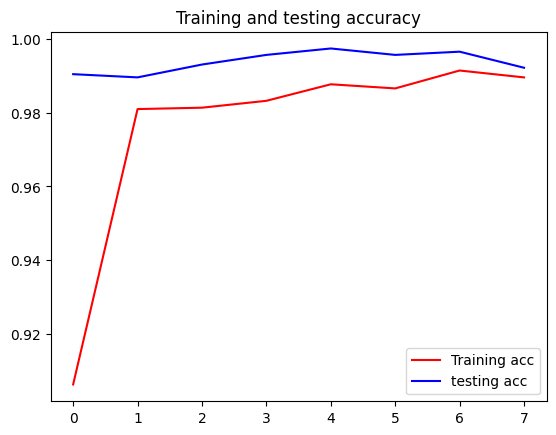

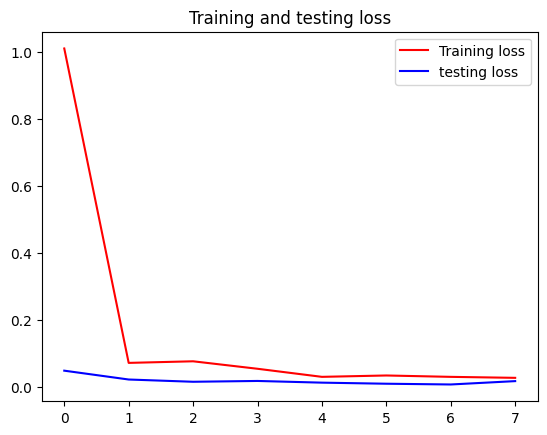

In [20]:
from matplotlib import pyplot as plt

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()

In [21]:
# model.save("mask_detection.h5")